# Lab-8: Introduction to Statistical Machine Learning Logistic Regression

### By Mohan Bakshi

In [5]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Importing dataset
df = pd.read_csv('SAheart.csv')
display(df.head())

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


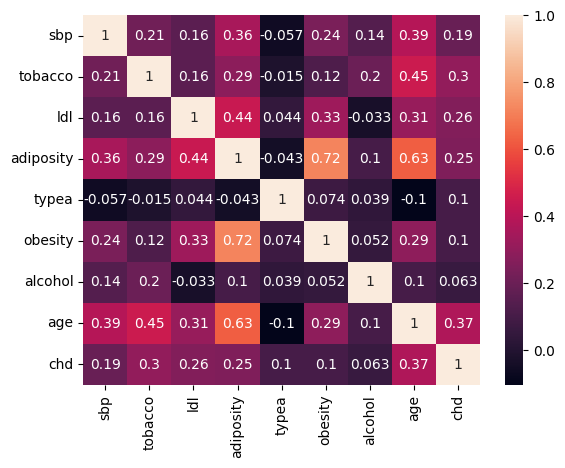

In [17]:
#Calculating and plotting correlation matrix

coor_matrix = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea',
'obesity', 'alcohol', 'age', 'chd']].corr()
sn.heatmap(coor_matrix, annot=True)
plt.show()

__Observations from Correlation Heatmap Analysis__

The heatmap illustrates the relationships between the variables in our South Africa Health status dataset. Each cell indicates the correlation coefficient (Pearson's r) between two variables, which ranges from -1 to 1. The heatmap's darker colour (black) represents weak correlations(0). However, the lighter colour (Beige) indicates a strong relationship (1). Furthermore, colours such as Dark Purple, Purple, and Red represent the moderate association between the variables.

__Correlation Strength:__ We find high positive correlations (r > 0.7) between Obesity and Adiposity i.e (0.72). However, Adiposity depicts a moderate relation with the Idl (0.44). On the other hand, Obisity shows a weak relationship towards the Tobacco (0.12).

__Outliers and Unexpected Relationships:__ An unexpected finding is the weak correlation between Adiposity and Typea(-0.043).

<function matplotlib.pyplot.show(close=None, block=None)>

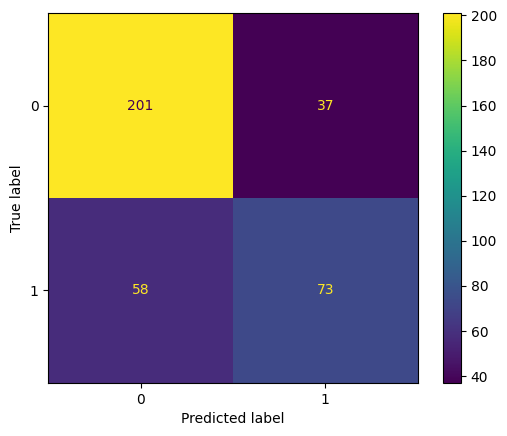

In [6]:
# Random split dataset into training dataset (80%) and testing dataset (20%)

# Selecting the features for the dataset
feature_data = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea',
'obesity', 'alcohol', 'age']].values

# Extracting the labels
labels = df['chd'].values

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(feature_data,
labels, test_size=0.20, random_state=2021)

# Train a logistic regression model with the training data and training labels
trained_lr_model = LogisticRegression(max_iter=1000).fit(X_train, Y_train)

# predictions of label classes for the seen train data
predicted_Y_train = trained_lr_model.predict(X_train)
label_class_set = trained_lr_model.classes_

# calculate and plot confusion matrix
cm = metrics.confusion_matrix(Y_train, predicted_Y_train,
labels=label_class_set)
disp = ConfusionMatrixDisplay(cm, display_labels=label_class_set)
disp.plot()
plt.show

The diagonal elements are the correctly predicted samples. A total of 274 samples were correctly predicted out of the total 369 samples. Thus, the overall accuracy is 74.25%.


In [7]:
# calculate accuracy score
accuracy = metrics.accuracy_score(Y_train, predicted_Y_train)
print(accuracy)

0.7425474254742548


The accuracy score calculated for the model on the training data is approximately 74.25%. This indicates that the model correctly predicts the target variable in about 74.25% of the cases, showcasing a reasonably good overall performance on the training set.

In [18]:
# calculate precision score
precision = metrics.precision_score(Y_train, predicted_Y_train)
print(precision)

0.6636363636363637


The precision score calculated for the model on the training data is approximately 66.36%, which means that when the model predicts a positive outcome, it is correct about 66.36% of the time.

In [9]:
# calculate recall score
recall = metrics.recall_score(Y_train, predicted_Y_train)
print(recall)

0.5572519083969466


The recall score obtained for the model on the training data is approximately 55.73% which means that the model correctly identifies about 55.73% of the actual positive cases.

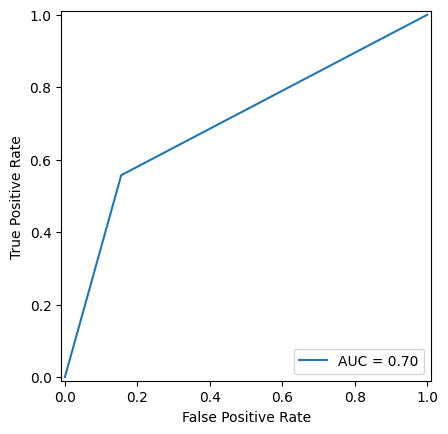

In [10]:
# calculate and plot ROC AUC curve
FPR, TPR, _ = metrics.roc_curve(Y_train, predicted_Y_train)
roc_auc = metrics.auc(FPR, TPR)
disp = metrics.RocCurveDisplay(fpr=FPR, tpr=TPR, roc_auc=roc_auc)
disp.plot()
plt.show()


The AUC of the ROC curve is 0.70, which means the model performs better than a random guess but is not a perfect classifier.

<function matplotlib.pyplot.show(close=None, block=None)>

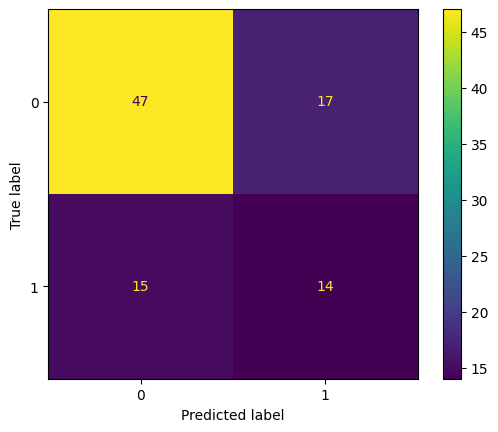

In [11]:
# predictions of label class for unseen test data
predicted_Y_test = trained_lr_model.predict(X_test)
predicted_Y_test

# calculate and plot confusion matrix
cm_test = metrics.confusion_matrix(Y_test, predicted_Y_test,
labels=label_class_set)
disp = ConfusionMatrixDisplay(cm_test,
display_labels=label_class_set)
disp.plot()
plt.show

The diagonal elements are the correctly predicted samples. A total of 61 samples were correctly predicted out of the total 93 samples. Thus, the overall accuracy is 65.59%.


In [12]:
# calculate accuracy score
accuracy_test = metrics.accuracy_score(Y_test, predicted_Y_test)
print(accuracy_test)

0.6559139784946236


The accuracy score calculated for the model on the test data is approximately 65.59%. This indicates that the model correctly predicts the target variable in about 65.59% of the cases, showcasing a reasonably good overall performance on the unseen test set.

In [13]:
# calculate precision score
precision_test = metrics.precision_score(Y_test, predicted_Y_test)
print(precision_test)

0.45161290322580644


The precision score calculated for the model on the test data is approximately 45.16%, which means that when the model predicts a positive outcome, it is correct about 45.16% of the time.

In [14]:
# calculate recall score
recall_test = metrics.recall_score(Y_test, predicted_Y_test)
print(recall_test)

0.4827586206896552


The recall score obtained for the model on the testing data is approximately 48.27% which means that the model correctly identifies about 48.27% of the actual positive cases.

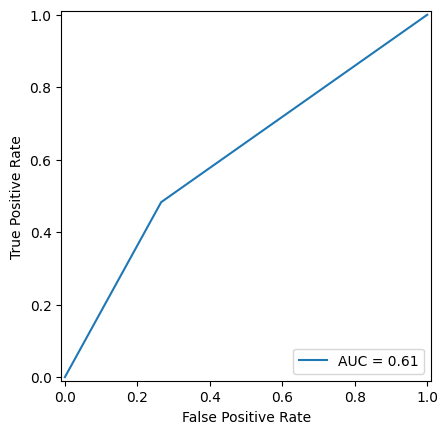

In [15]:
# calculate and plot ROC AUC curve
FPR_test, TPR_test, _ = metrics.roc_curve(Y_test,
predicted_Y_test)
roc_auc_test = metrics.auc(FPR_test, TPR_test)
disp = metrics.RocCurveDisplay(fpr=FPR_test, tpr=TPR_test,
roc_auc=roc_auc_test)
disp.plot()
plt.show()

The AUC of the ROC curve is 0.61, which means the model performs better than a random guess but is not a perfect classifier.